<a href="https://colab.research.google.com/github/lvisentin/ds-projects/blob/main/wallet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import quandl

In [ ]:
stocksList = ['ITUB4.SA', 'BBDC4.SA', 'WEGE3.SA', 'ABEV3.SA']
startDate = '2020-01-01'
endDate = '2021-02-10'

prices = pd.DataFrame()

In [ ]:
for stock in stocksList:
    prices[stock] = yf.download(stock, start = startDate, end = endDate)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ITUB4.SA,BBDC4.SA,WEGE3.SA,ABEV3.SA
Date,,,,
2020-01-02,36.299713,32.244991,17.296635,18.616690
2020-01-03,35.917919,32.259827,17.075762,18.354891
2020-01-06,35.383385,31.683605,17.119936,18.442158
2020-01-07,34.562531,31.133181,17.252457,18.480942
2020-01-08,33.999352,30.651560,16.599659,18.393675
...,...,...,...,...
2021-02-03,27.792347,22.319962,43.871773,15.680000
2021-02-04,27.674582,22.991776,42.337959,15.600000
2021-02-05,27.556816,22.868019,41.808552,15.520000


In [ ]:
buys = {
    'ITUB4.SA': 1000,
    'BBDC4.SA': 1000,
    'WEGE3.SA': 1000,
    'ABEV3.SA': 1000,
}

In [ ]:
buys_df = pd.Series(data=buys, index=list(buys.keys()))

first = prices.iloc[0]
stocks_qtt = buys_df/first

pl = prices*stocks_qtt

pl_filter = pl.dropna(axis='rows')

pl_filter['PL Total'] = pl_filter.iloc[:].sum(axis = 1)

quandl.ApiConfig.api_key = 'Us6x1ikNziCRU_MFiN86'

cdi = quandl.get('BCB/1161', start_date = startDate)

cdi.rename(columns = {'Value': 'CDI'}, inplace = True)

cdi = cdi[~(cdi == 0).any(axis = 1)]

benchmarks = ['^BVSP', 'USDBRL=X']

benchs = pd.DataFrame()

""


In [ ]:
for bench in benchmarks:
    benchs[bench] = yf.download(bench, start = startDate, end = endDate)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,^BVSP,USDBRL=X
Date,,
2020-01-02,118573.0,4.0163
2020-01-03,117707.0,4.0234
2020-01-06,116878.0,4.0570
2020-01-07,116662.0,4.0604
2020-01-08,116247.0,4.0662
...,...,...
2021-02-03,119725.0,5.3669
2021-02-04,119261.0,5.3520
2021-02-05,119925.0,5.4257


In [ ]:

benchs = pd.merge(benchs, cdi, how = 'inner', on = 'Date')

bench_pl = pd.merge(benchs, pl_filter, how = 'inner', on = 'Date')


In [ ]:

lista = []

for i in range(len(bench_pl)):
    if i == 0:
        lista.append(1)
    else:
        lista.append((lista[i-1]) * (1 + (bench_pl.CDI.iloc[i-1])/100))


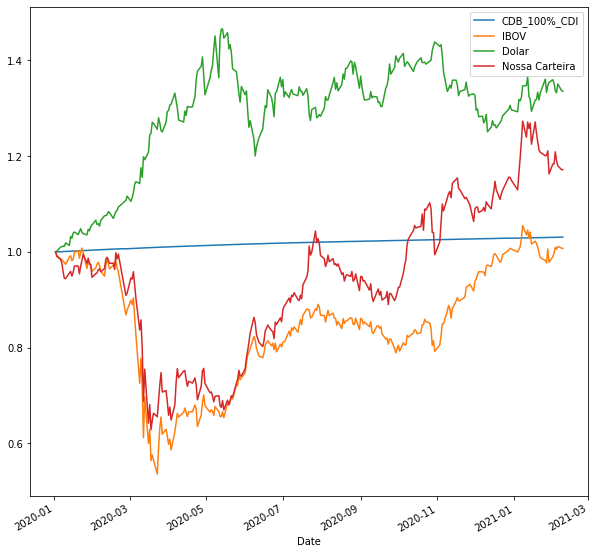

In [ ]:
bench_pl['CDB_100%_CDI'] = lista

normal_pl = bench_pl/bench_pl.iloc[0]
normal_pl.rename(columns = {'^BVSP': 'IBOV', 'USDBRL=X' : 'Dolar', 'PL Total': 'Nossa Carteira'}, inplace = True)

normal_pl[['CDB_100%_CDI', 'IBOV', 'Dolar', 'Nossa Carteira']].plot(figsize = (10,10))